# Muzeo Egizio

Create phase from a selected point.

In [1]:
from XRDXRFutils import Phase,DatabaseXRD, DataXRD, SpectraXRD, GaussNewton, PhaseList, PhaseMap, PhaseSearch, PhaseMapSave
from XRDXRFutils import GammaMap,ChiMap

import os
import pickle


from joblib import Parallel, delayed
import h5py
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit, least_squares

from numpy import linspace,concatenate,sqrt,log,histogram,array
from matplotlib.pyplot import sca,vlines,show,fill_between,sca,legend,imshow,subplots,plot,xlim,ylim,xlabel,ylabel,cm,title,scatter,colorbar,figure,vlines
from sklearn.cluster import KMeans,MiniBatchKMeans

from multiprocessing import Pool

from PIL import Image

def f_linear(x,a,b):
    return a*x + b
def f_loss(x,t,y):
    return (x[0]*t + x[1]) - y

In [7]:
path_xrd = '/home/shared/dataXRDXRF/MuseoEgizio2022/VoltoGeroglifici/'
path_database = '/home/shared/DatabaseXRD'

path_data = 'data/' # data of intermediate results, for fast loading
path_figures = 'figures/' # figures generated by the script
path_results = 'results/' # results generated by the script: raw data, tif maps

min_theta = 17
max_theta = 43
min_intensity = 0.1 # among the tabulated peaks, selects only the ones above this threshold of intensity (scale between 0 and 1)
first_n_peaks = None # selects the first n most intense peaks (if None, leaves all the peaks)\

sigma = 0.13

Loading: /home/shared/dataXRDXRF/MuseoEgizio2022/VoltoGeroglifici/xrd.h5
a: -1327.1 s: 2729.8 beta: 43.202


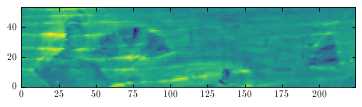

In [8]:
try:
    data = DataXRD().load_h5(path_xrd + 'xrd.h5')
except:
    print('Reading from raw data.')
    data = DataXRD().read_params(path_xrd + 'Scanning_Parameters.txt').read(path_xrd).calibrate_from_file(path_xrd + 'calibration.ini').remove_background(std = 5).save_h5(path_xrd + 'xrd.h5')
    
print("a: %.1f s: %.1f beta: %.3f"%(data.opt[0],data.opt[1],data.opt[2]))

figure(figsize=(6,4))
im = imshow(data.data.sum(axis=2))
show()

In [9]:
database = DatabaseXRD().read_cifs(path_database)

print('Phases in database:',len(database))

lazurite = database['Lazurite'][0]
hydrocerussite = database['Hydrocerussite'][0]
cinnabar = database['Cinnabar'][1]
barite = database['Barite'][0]
spinel = database['Spinel'][0]
calcite = database['Calcite'][0]
hematite = database['Hematite'][4]

huntite = database['Huntite'][0]
as4 = database['As4 O6'][0]

orpiment = database['Orpiment'][0]
cuprorivaite = database['Cuprorivaite'][0]

phases_a_s = PhaseList([hematite,orpiment,cuprorivaite,huntite,as4])

phases_a_s.get_theta(min_intensity=min_intensity,
                 min_theta = min_theta,
                 max_theta = max_theta,
                first_n_peaks = first_n_peaks)

if 'pmax_a' in locals():
    data.opt[0] = pmax_a
    data.opt[1] = pmax_s

Phases in database: 137


In [10]:
pm = GammaMap().from_data(data,phases_a_s,sigma = sigma)

## Select a specific pixel

[-1334.05029712  2748.46562288    43.20211896]


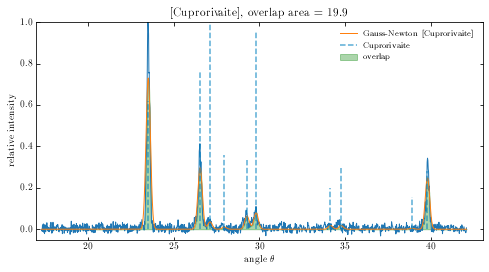

In [48]:
%matplotlib inline
selected = pm.get_pixel(203,25)

selected.search()

g = GaussNewton(PhaseList([cuprorivaite]),selected.spectrum,sigma=sigma)

g.fit_cycle(gamma=True,steps = 128,a=True,s=True)

print(g.opt)

figure(figsize=(8,4))

title(f'{g.label}, overlap area = {g.overlap_area():.1f}')

g.plot_spectra(lw = 1)
g.plot('-', label='Gauss-Newton %s'%g.label, lw=1)
g.phase.plot(alpha=0.66)

fill_between(g.theta, g.overlap(), color = 'g', alpha = 0.33, label='overlap')

legend(frameon = False)

ylim(-0.05, 1)
xlim(17, 43)
xlabel(r'angle $\theta$')
ylabel(r'relative intensity')

show()

[-1392.22945556  3055.4332925     43.20211896]


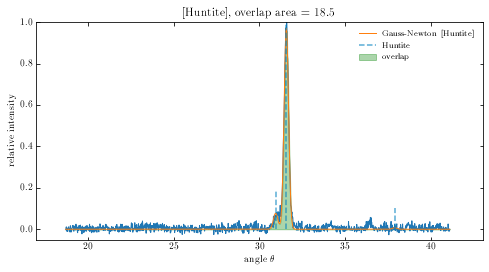

In [44]:
%matplotlib inline
selected = pm.get_pixel(94,28)

selected.search()

g = GaussNewton(PhaseList([huntite]),selected.spectrum,sigma=sigma)

g.fit_cycle(gamma=True,steps = 128,a=True,s=True)
print(g.opt)

figure(figsize=(8,4))

title(f'{g.label}, overlap area = {g.overlap_area():.1f}')

g.plot_spectra(lw = 1)
g.plot('-', label='Gauss-Newton %s'%g.label, lw=1)
g.phase.plot(alpha=0.66)

fill_between(g.theta, g.overlap(), color = 'g', alpha = 0.33, label='overlap')

legend(frameon = False)

ylim(-0.05, 1)
xlim(17, 43)
xlabel(r'angle $\theta$')
ylabel(r'relative intensity')

show()

[-1326.99568082  2701.75323521    43.20211896]


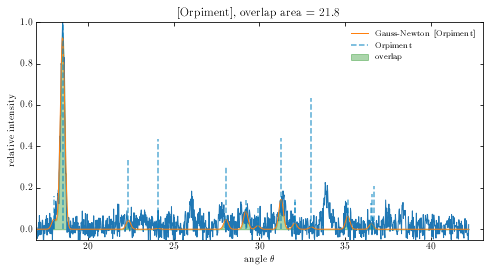

In [22]:
%matplotlib inline
selected = pm.get_pixel(150,30)

selected.search()

g = GaussNewton(PhaseList([orpiment]),selected.spectrum,sigma=sigma)

g.fit_cycle(gamma=True,steps = 128,a=True,s=True)
print(g.opt)

figure(figsize=(8,4))

title(f'{g.label}, overlap area = {g.overlap_area():.1f}')

g.plot_spectra(lw = 1)
g.plot('-', label='Gauss-Newton %s'%g.label, lw=1)
g.phase.plot(alpha=0.66)

fill_between(g.theta, g.overlap(), color = 'g', alpha = 0.33, label='overlap')

legend(frameon = False)

ylim(-0.05, 1)
xlim(17, 43)
xlabel(r'angle $\theta$')
ylabel(r'relative intensity')

show()

[-1324.30413729  2712.28784957    43.20211896]


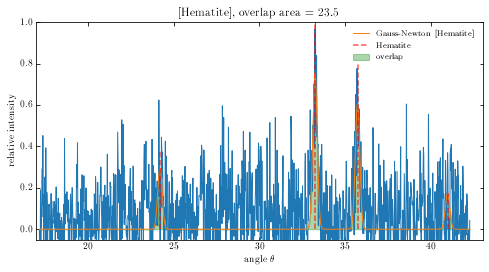

In [50]:
%matplotlib inline
selected = pm.get_pixel(22,6)

selected.search()

g = GaussNewton(PhaseList([hematite]),selected.spectrum,sigma=sigma)

g.fit_cycle(gamma=True,steps = 128,a=True,s=True)
print(g.opt)

figure(figsize=(8,4))

title(f'{g.label}, overlap area = {g.overlap_area():.1f}')

g.plot_spectra(lw = 1)
g.plot('-', label='Gauss-Newton %s'%g.label, lw=1)
g.phase.plot(color='r',alpha=0.66)

fill_between(g.theta, g.overlap(), color = 'g', alpha = 0.33, label='overlap')

legend(frameon = False)

ylim(-0.05, 1)
xlim(17, 43)
xlabel(r'angle $\theta$')
ylabel(r'relative intensity')

show()

[-1058.75242556  1609.06638713    43.20211896]


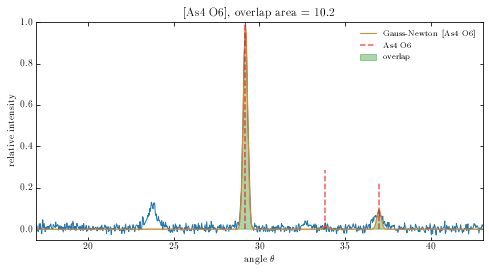

In [40]:
%matplotlib inline
selected = pm.get_pixel(163,28)

selected.search()

g = GaussNewton(PhaseList([as4]),selected.spectrum,sigma=sigma)

g.fit_cycle(gamma=True, steps = 128, a=True, s=True)
print(g.opt)

figure(figsize=(8,4))

title(f'{g.label}, overlap area = {g.overlap_area():.1f}')

g.plot_spectra(lw = 1)
g.plot('-', label='Gauss-Newton %s'%g.label, lw=1)
g.phase.plot(color='r',alpha=0.66)

fill_between(g.theta, g.overlap(), color = 'g', alpha = 0.33, label='overlap')

legend(frameon = False)

ylim(-0.05, 1)
xlim(17, 43)
xlabel(r'angle $\theta$')
ylabel(r'relative intensity')

show()